In [3]:
!git clone https://github.com/geneexpressionpolito/Transformers-for-gene-expression-prediction-from-raw-dna-sequences.git
!mv ./Transformers-for-gene-expression-prediction-from-raw-dna-sequences/Classes ./
!pip install import-ipynb
!gdown --folder 1u34ntvh4dL5Y5_hZSA9EDs5SZ32MPda1
import import_ipynb
import os

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [4]:
from Classes.DataManager import DataManager
from Classes.Transformer import projTransformer
from tensorflow import keras
import numpy as np
from gensim.models import Word2Vec
import h5py

%load_ext tensorboard
datadir = 'Dataset/embedded_data'

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/Transformer.ipynb
Populating the interactive namespace from numpy and matplotlib
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
print("> Loading DataManager...")
dm = DataManager(DeepLncLoc = True)

print("> Loading train data...")
X_trainhalflife, X_trainpromoter, y_train, _                = dm.get_train()

print("> Loading validation data...")
X_validationhalflife, X_validationpromoter, y_validation, _ = dm.get_validation()

print("> Loading test data...")
X_testhalflife, X_testpromoter, y_test, _                   = dm.get_test()

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



data loading takes at most 30s, we can improve it saving the numerical representation of sequences

Preprocessing-> Padding

In [6]:
maxlen=X_trainpromoter.shape[1]

model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 210, 64)]    0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 64)      256         input_1[0][0]                    
__________________________________________________________________________________________________
position_encoding2 (PositionEnc (None, 210, 64)      0           batch_normalization[0][0]        
__________________________________________________________________________________________________
transformer_block (TransformerB (None, 210, 64)      116224      position_encoding2[0][0]         
__________________________________________________________________________________

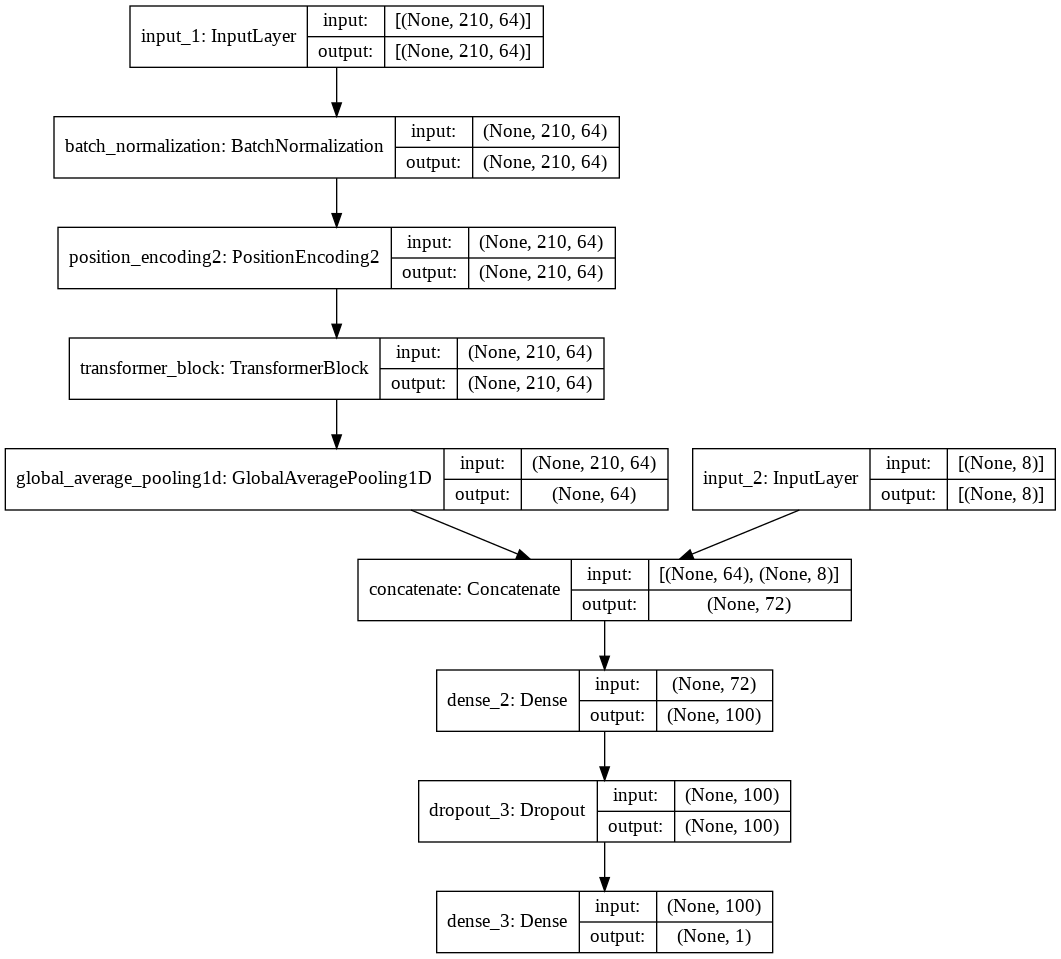


Parameters:
{'checkpoint_dir': 'DeepLncLoc_Transformer_lreNone/', 'model_type': 'DeepLncLoc', 'n_epochs': 300, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'maxlen': 210, 'embed_dim': 64, 'num_heads': 4, 'ff_dim': 384, 'vocab_size': 5, 'dense': 100, 'dropout_rate': 0.1, 'lr_reduction_epoch': None, 't_rate': 0.1, 'patience': 30, 'optimizer': 'Adam', 'warmup_steps': 8000, 'shuffle': True, 'logdir': None, 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fd1601e88d0>}

Epoch 1/300
128/128 [==============================] - 7s 40ms/step - loss: 0.7908 - val_loss: 1.2159

Epoch 00001: val_loss improved from inf to 1.21595, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 2/300
128/128 [==============================] - 5s 38ms/step - loss: 0.5912 - val_loss: 1.1300

Epoch 00002: val_loss improved from 1.21595 to 1.12996, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 3/300
128/128 [==============================] - 5s 38ms/step - loss: 0.5457 - val_loss: 1.1310

Epoch 00003: val_loss did not improve from 1.12996
Epoch 4/300
128/128 [==============================] - 5s 38ms/step - loss: 0.5217 - val_loss: 0.6432

Epoch 00004: val_loss improved from 1.12996 to 0.64324, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 5/300
128/128 [==============================] - 5s 39ms/step - loss: 0.5035 - val_loss: 0.5591

Epoch 00005: val_loss improved from 0.64324 to 0.55914, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 6/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4990 - val_loss: 0.5149

Epoch 00006: val_loss improved from 0.55914 to 0.51495, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 7/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4857 - val_loss: 0.4669

Epoch 00007: val_loss improved from 0.51495 to 0.46692, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 8/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4783 - val_loss: 0.4588

Epoch 00008: val_loss improved from 0.46692 to 0.45876, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 9/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4680 - val_loss: 0.4363

Epoch 00009: val_loss improved from 0.45876 to 0.43634, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 10/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4652 - val_loss: 0.4638

Epoch 00010: val_loss did not improve from 0.43634
Epoch 11/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4529 - val_loss: 0.4544

Epoch 00011: val_loss did not improve from 0.43634
Epoch 12/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4486 - val_loss: 0.4445

Epoch 00012: val_loss did not improve from 0.43634
Epoch 13/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4530 - val_loss: 0.4648

Epoch 00013: val_loss did not improve from 0.43634
Epoch 14/300
128/128 [==============================] - 5s 38ms/step - loss: 0.4389 - val_loss: 0.4288

Epoch 00014: val_loss improved from 0.43634 to 0.42881, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 15/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4322 - val_loss: 0.4254

Epoch 00015: val_loss improved from 0.42881 to 0.42541, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 16/300
128/128 [==============================] - 5s 38ms/step - loss: 0.4332 - val_loss: 0.4245

Epoch 00016: val_loss improved from 0.42541 to 0.42450, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 17/300
128/128 [==============================] - 5s 38ms/step - loss: 0.4307 - val_loss: 0.4444

Epoch 00017: val_loss did not improve from 0.42450
Epoch 18/300
128/128 [==============================] - 5s 38ms/step - loss: 0.4241 - val_loss: 0.4331

Epoch 00018: val_loss did not improve from 0.42450
Epoch 19/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4317 - val_loss: 0.4136

Epoch 00019: val_loss improved from 0.42450 to 0.41364, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 20/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4255 - val_loss: 0.4157

Epoch 00020: val_loss did not improve from 0.41364
Epoch 21/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4195 - val_loss: 0.4108

Epoch 00021: val_loss improved from 0.41364 to 0.41079, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 22/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4188 - val_loss: 0.4148

Epoch 00022: val_loss did not improve from 0.41079
Epoch 23/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4120 - val_loss: 0.4085

Epoch 00023: val_loss improved from 0.41079 to 0.40851, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 24/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4110 - val_loss: 0.4128

Epoch 00024: val_loss did not improve from 0.40851
Epoch 25/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4093 - val_loss: 0.4247

Epoch 00025: val_loss did not improve from 0.40851
Epoch 26/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4121 - val_loss: 0.4150

Epoch 00026: val_loss did not improve from 0.40851
Epoch 27/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4064 - val_loss: 0.4124

Epoch 00027: val_loss did not improve from 0.40851
Epoch 28/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4090 - val_loss: 0.4048

Epoch 00028: val_loss improved from 0.40851 to 0.40482, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 29/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4019 - val_loss: 0.4180

Epoch 00029: val_loss did not improve from 0.40482
Epoch 30/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3997 - val_loss: 0.4351

Epoch 00030: val_loss did not improve from 0.40482
Epoch 31/300
128/128 [==============================] - 5s 39ms/step - loss: 0.4033 - val_loss: 0.4065

Epoch 00031: val_loss did not improve from 0.40482
Epoch 32/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3904 - val_loss: 0.4117

Epoch 00032: val_loss did not improve from 0.40482
Epoch 33/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3959 - val_loss: 0.4461

Epoch 00033: val_loss did not improve from 0.40482
Epoch 34/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3952 - val_loss: 0.4082

Epoch 00034: val_loss did not improve from 0.40482
Epoch 35/300
128/128 [==============================] - 5s 38ms/step -

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 37/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3879 - val_loss: 0.4053

Epoch 00037: val_loss did not improve from 0.39496
Epoch 38/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3861 - val_loss: 0.3973

Epoch 00038: val_loss did not improve from 0.39496
Epoch 39/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3843 - val_loss: 0.4006

Epoch 00039: val_loss did not improve from 0.39496
Epoch 40/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3904 - val_loss: 0.4033

Epoch 00040: val_loss did not improve from 0.39496
Epoch 41/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3785 - val_loss: 0.3994

Epoch 00041: val_loss did not improve from 0.39496
Epoch 42/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3754 - val_loss: 0.4322

Epoch 00042: val_loss did not improve from 0.39496
Epoch 43/300
128/128 [==============================] - 5s 38ms/step -

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 50/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3612 - val_loss: 0.3923

Epoch 00050: val_loss improved from 0.39407 to 0.39233, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 51/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3568 - val_loss: 0.4340

Epoch 00051: val_loss did not improve from 0.39233
Epoch 52/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3651 - val_loss: 0.3877

Epoch 00052: val_loss improved from 0.39233 to 0.38771, saving model to Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 53/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3565 - val_loss: 0.3895

Epoch 00053: val_loss did not improve from 0.38771
Epoch 54/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3560 - val_loss: 0.3969

Epoch 00054: val_loss did not improve from 0.38771
Epoch 55/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3560 - val_loss: 0.3931

Epoch 00055: val_loss did not improve from 0.38771
Epoch 56/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3550 - val_loss: 0.4012

Epoch 00056: val_loss did not improve from 0.38771
Epoch 57/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3508 - val_loss: 0.3942

Epoch 00057: val_loss did not improve from 0.38771
Epoch 58/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3496 - val_loss: 0.3908

Epoch 00058: val_loss did not improve from 0.38771
Epoch 59/300
128/128 [==============================] - 5s 39ms/step -

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 64/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3457 - val_loss: 0.3941

Epoch 00064: val_loss did not improve from 0.38612
Epoch 65/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3431 - val_loss: 0.4073

Epoch 00065: val_loss did not improve from 0.38612
Epoch 66/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3371 - val_loss: 0.3929

Epoch 00066: val_loss did not improve from 0.38612
Epoch 67/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3336 - val_loss: 0.3935

Epoch 00067: val_loss did not improve from 0.38612
Epoch 68/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3292 - val_loss: 0.3923

Epoch 00068: val_loss did not improve from 0.38612
Epoch 69/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3297 - val_loss: 0.4076

Epoch 00069: val_loss did not improve from 0.38612
Epoch 70/300
128/128 [==============================] - 5s 38ms/step -

INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DeepLncLoc_Transformer_lreNone/bestmodel_transformer_DeepLncLoc/assets


Epoch 79/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3165 - val_loss: 0.3986

Epoch 00079: val_loss did not improve from 0.38119
Epoch 80/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3150 - val_loss: 0.4057

Epoch 00080: val_loss did not improve from 0.38119
Epoch 81/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3140 - val_loss: 0.3891

Epoch 00081: val_loss did not improve from 0.38119
Epoch 82/300
128/128 [==============================] - 5s 39ms/step - loss: 0.3181 - val_loss: 0.4199

Epoch 00082: val_loss did not improve from 0.38119
Epoch 83/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3119 - val_loss: 0.3833

Epoch 00083: val_loss did not improve from 0.38119
Epoch 84/300
128/128 [==============================] - 5s 38ms/step - loss: 0.3093 - val_loss: 0.3932

Epoch 00084: val_loss did not improve from 0.38119
Epoch 85/300
128/128 [==============================] - 5s 38ms/step -

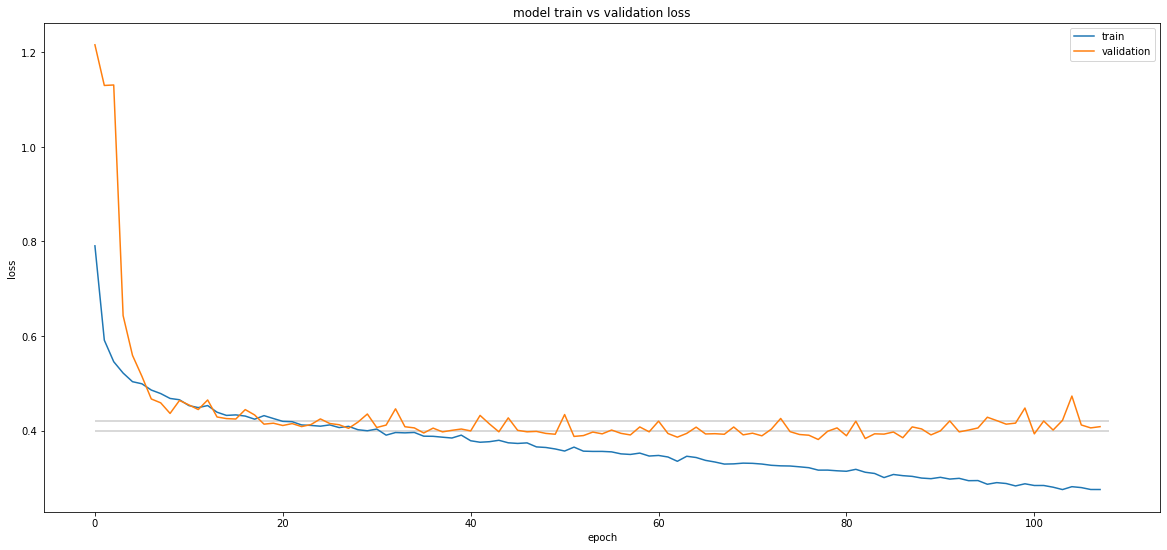

In [7]:
# # Clear any logs from previous runs
# !rm -rf ./logs/transformer_new_embedding_0-002/

model_type="DeepLncLoc"
logdir = None

net = projTransformer(checkpoint_dir="DeepLncLoc_Transformer_lreNone/",model_type=model_type, n_epochs=300, batch_size=128, 
                      learning_rate=5e-4, lr_reduction_epoch=None, maxlen=maxlen, embed_dim=64, num_heads=4, ff_dim=384, dense=100, 
                      dropout_rate=0.1, logdir=logdir, optimizer="Adam", patience=30)

net.train_model([X_trainpromoter, X_trainhalflife], y_train, [X_validationpromoter, X_validationhalflife], y_validation)

In [8]:
net.evaluate([X_testpromoter, X_testhalflife], y_test)

Test R^2 = 0.613


In [9]:
net.evaluate_best([X_testpromoter, X_testhalflife], y_test, True)

Test R^2 = 0.613


0.613207208083314

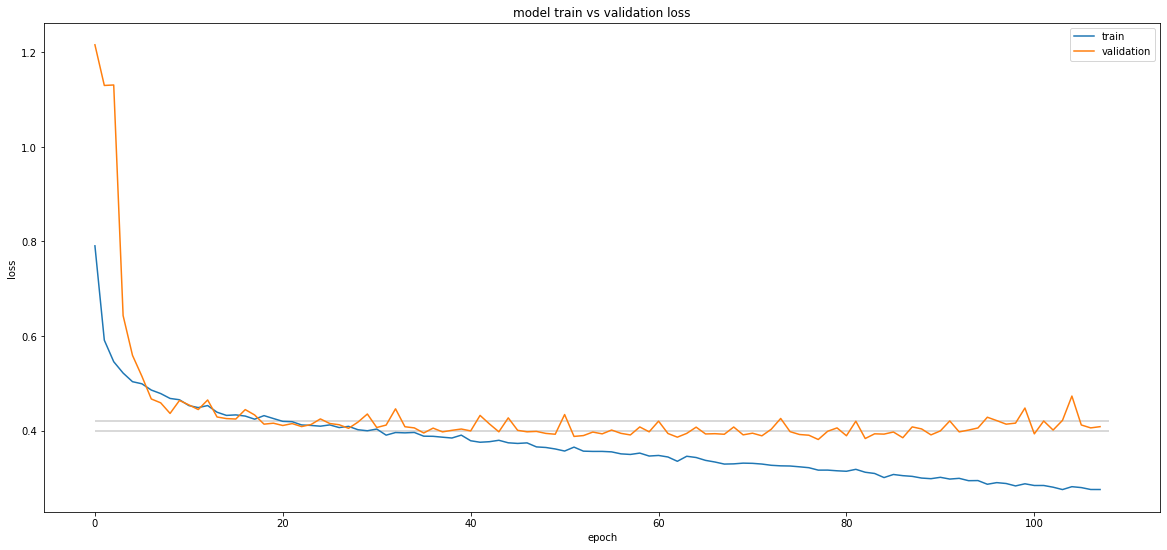

In [10]:
net.plot_train()

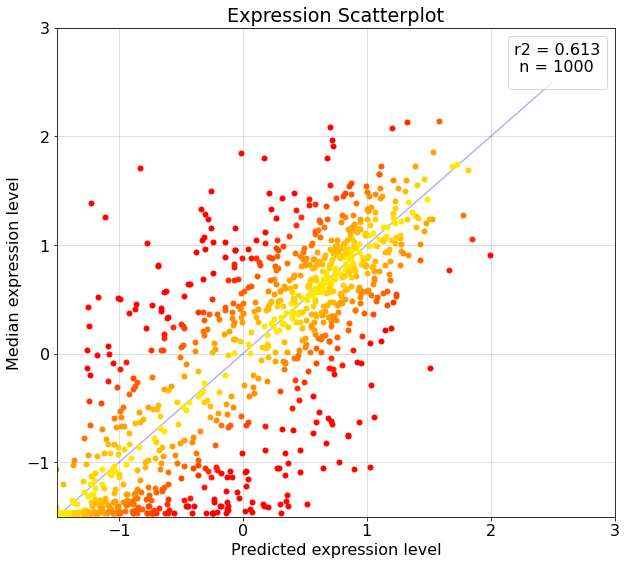

In [11]:
net.plot_r2([X_testpromoter, X_testhalflife], y_test, True)

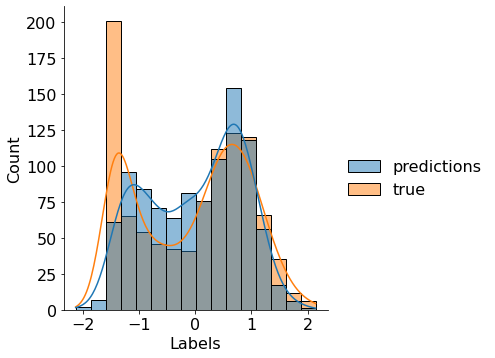

In [12]:
net.plot_kde([X_testpromoter, X_testhalflife], y_test, True)

In [19]:
import tensorflow as tf
model = tf.keras.models.load_model("Saved_Models/DeepLncLoc_transformer")

In [20]:
from scipy import stats
x = [X_testpromoter, X_testhalflife]
predictions = model.predict(x).flatten()
slope, intercept, r_value, p_value, std_err = stats.linregress(predictions, y_test)
print('Test R^2 = %.3f' % r_value**2)

Test R^2 = 0.613
